<a href="https://colab.research.google.com/github/milanajudiya/Appliances_Energy_Prediction/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data-driven prediction of energy use of appliances**
##The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters). 


## **Data Attributes:**

###**date:** time year-month-day hour:minute:second
###**Appliances:** energy use in Wh (Dependent variable)
###**lights:** energy use of light fixtures in the house in Wh (Drop this column)
###**T1:** Temperature in kitchen area, in Celsius
###**RH_1:** Humidity in kitchen area, in %
###**T2:** Temperature in living room area, in Celsius 
###**RH_2:**Humidity in living room area, in %
###**T3:** Temperature in laundry room area
###**RH_3:** Humidity in laundry room area, in % 
###**T4:** Temperature in office room, in Celsius 
###**RH_4:**Humidity in office room, in %
###**T5:** Temperature in bathroom, in Celsius
###**RH_5:** Humidity in bathroom, in % 
###**T6:**Temperature outside the building (north side), in Celsius
###**RH_6:**Humidity outside the building (north side), in %
###**T7:** Temperature in ironing room , in Celsius
###**RH_7:** Humidity in ironing room, in % 
###**T8:** Temperature in teenager room 2, in Celsius 
###**RH_8:**Humidity in teenager room 2, in %
###**T9:**Temperature in parents room, in Celsius
###**RH_9:** Humidity in parents room, in % 
###**T_out:** Temperature outside (from Chievres weather station), in Celsius 
###**Press_mm_hg:** Pressure (from Chievres weather station), in mm Hg 
###**RH_out:**Humidity outside (from Chievres weather station), in %
###**Wind speed:** (from Chievres weather station), in m/s
###**Visibility:** (from Chievres weather station), in km
###**Tdewpoint:** (from Chievres weather station), Â°C
###**rv1:** Random variable 1, nondimensional
###**rv2:**Random variable 2, nondimensiona

## **Import Statements**

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading and Inspecting Data**

In [136]:
#load dataset

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_application_energy.csv")

In [137]:
df.shape

(19735, 29)

## **Data Preprocessing**

In [138]:
pd.set_option('display.max_columns', None)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [139]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
# checking the null values 
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
# make copy of original dataset

df_energy=df.copy()

In [10]:
df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## **Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

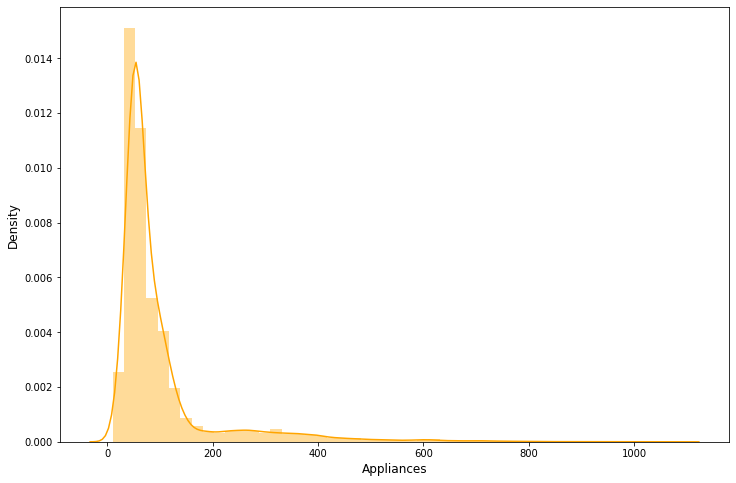

In [17]:
# graph of Dependent variable

plt.figure(figsize=(12,8))
sns.distplot(df_energy["Appliances"],color="orange")
plt.xlabel("Appliances",size=12)
plt.ylabel("Density",size=12)

In [11]:
df_energy["date"]=df_energy["date"].astype("datetime64")

In [12]:
# extract weekday from date column

df_energy["weekday"]=df_energy["date"].dt.weekday

In [13]:
# extract month from date column

df_energy["month"]=df_energy["date"].dt.month

In [14]:
df_energy["Hour"]=df_energy["date"].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

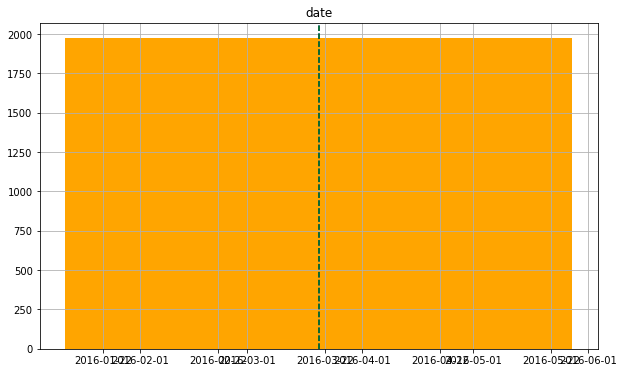

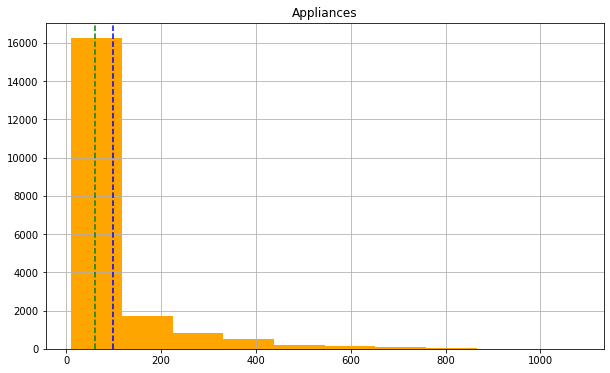

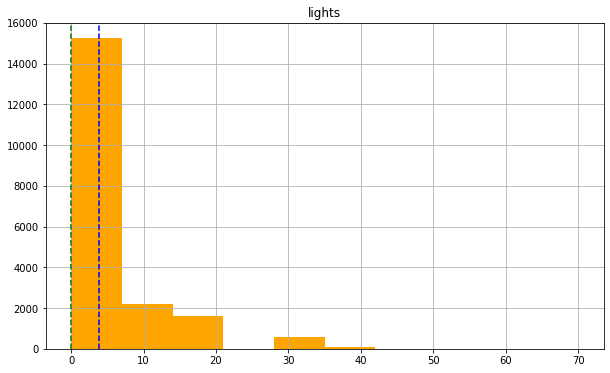

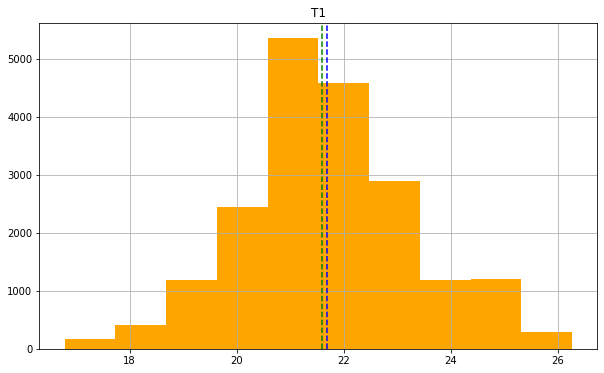

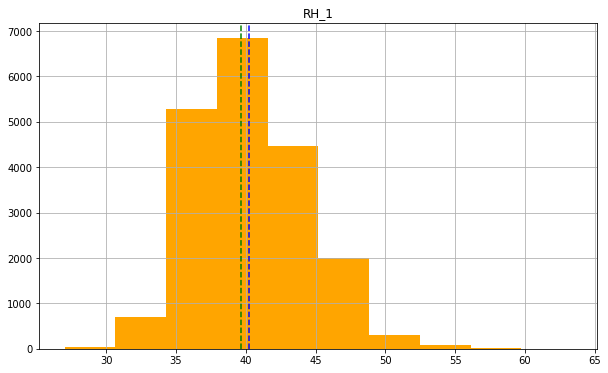

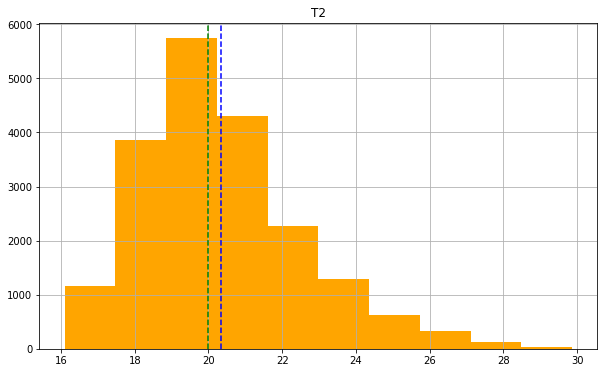

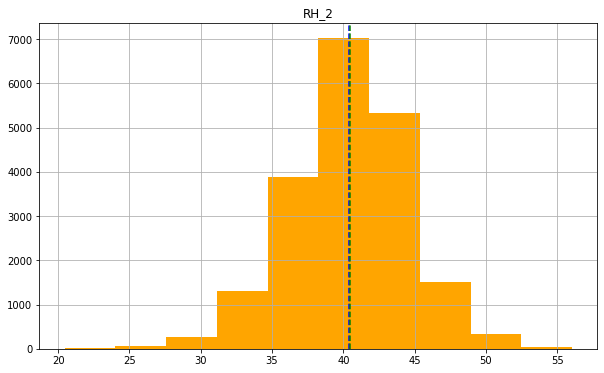

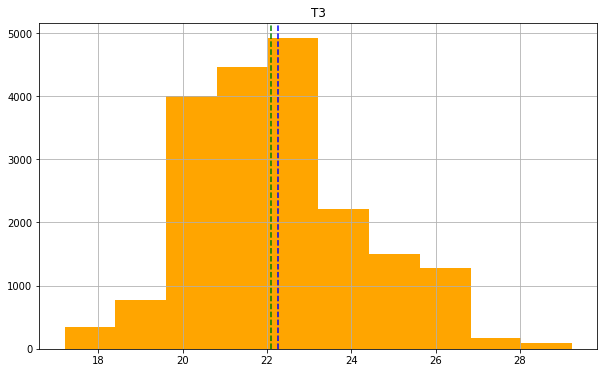

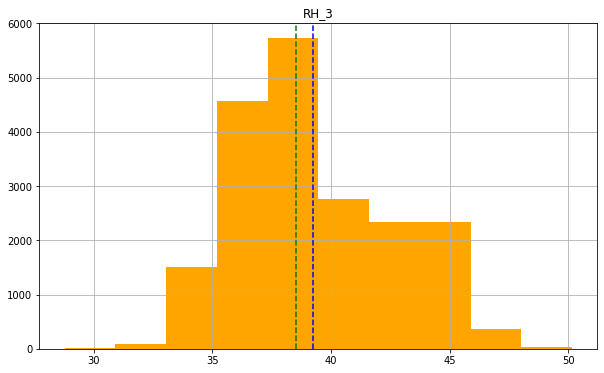

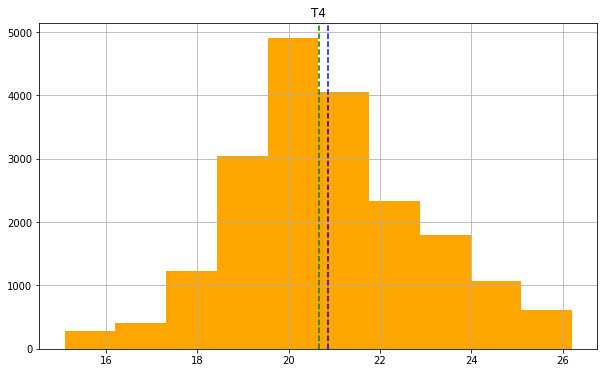

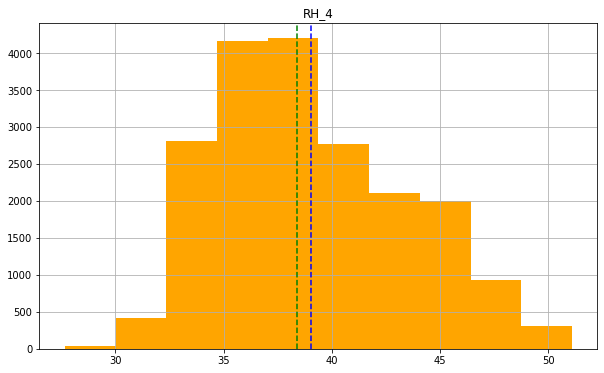

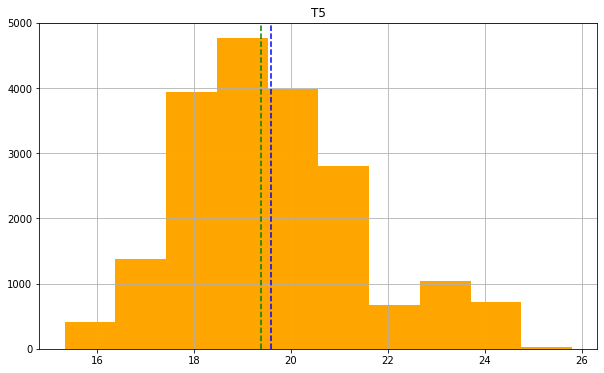

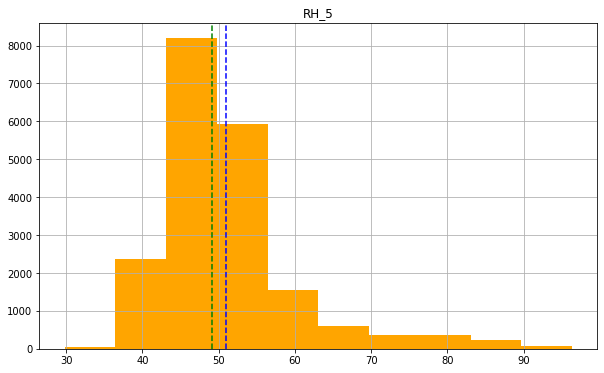

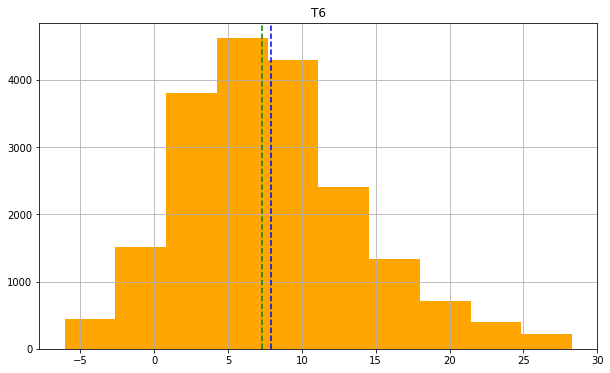

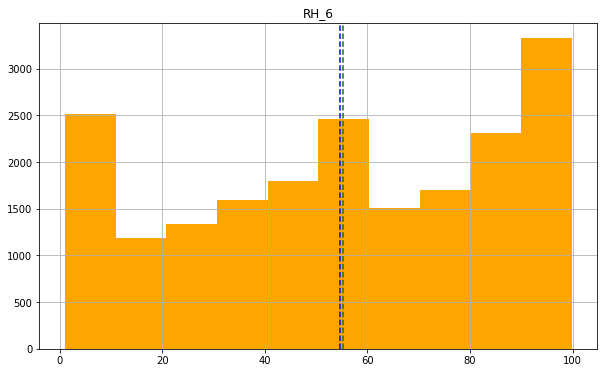

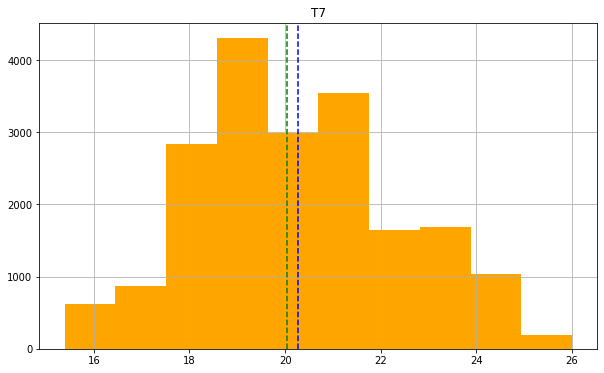

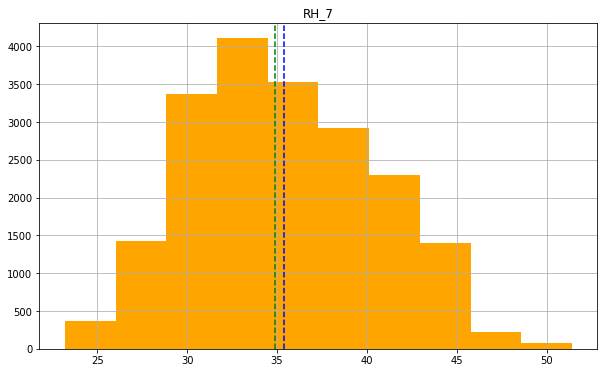

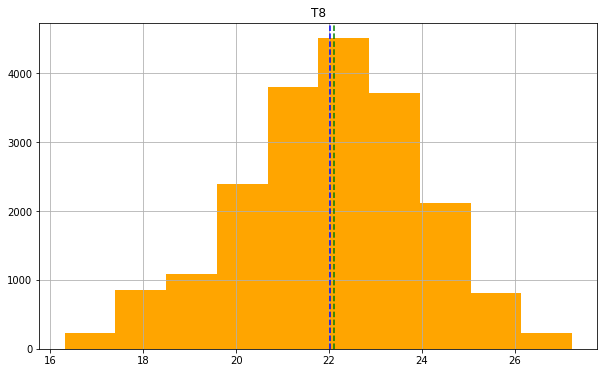

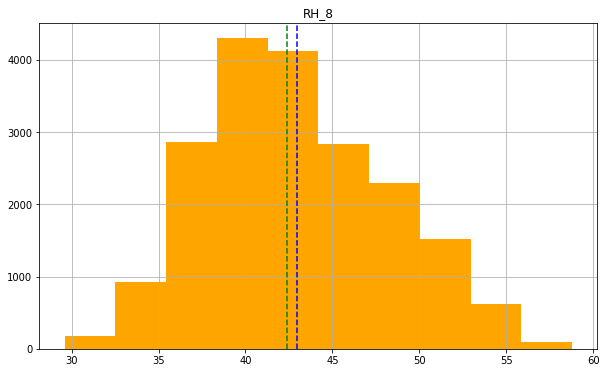

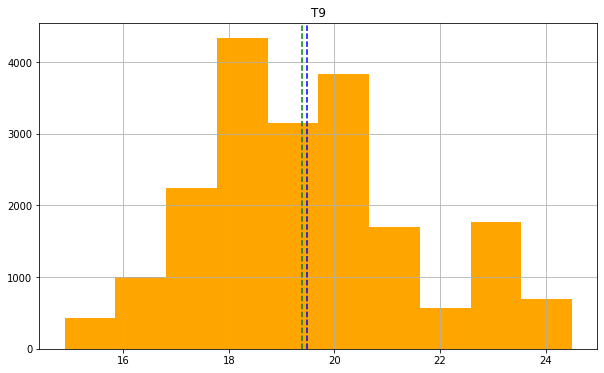

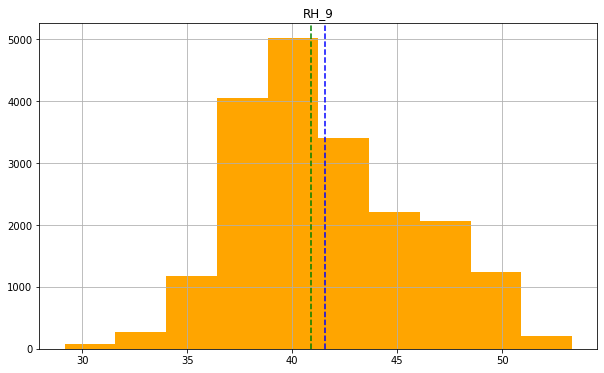

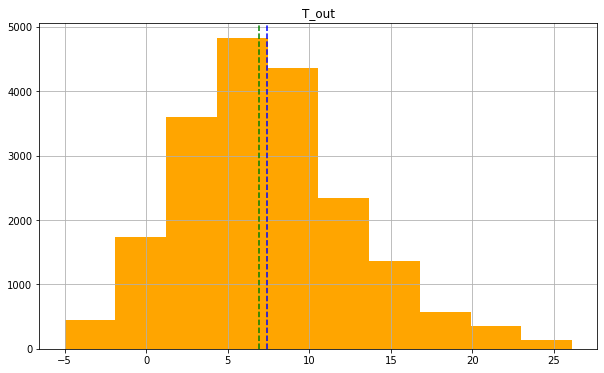

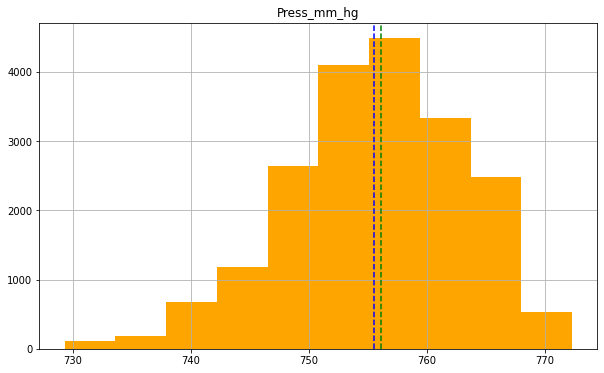

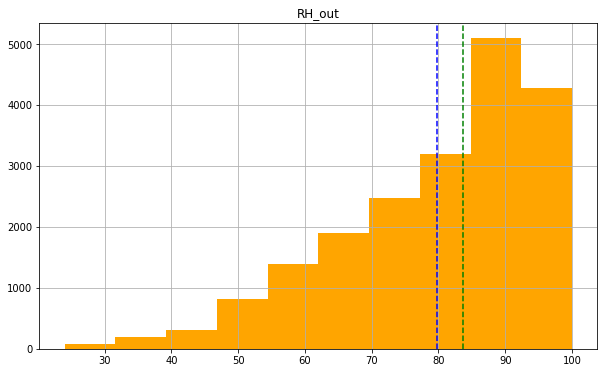

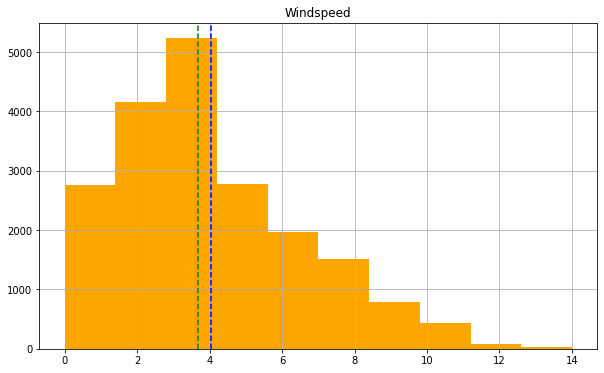

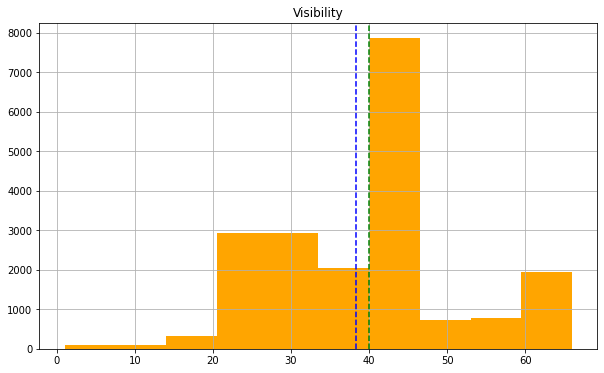

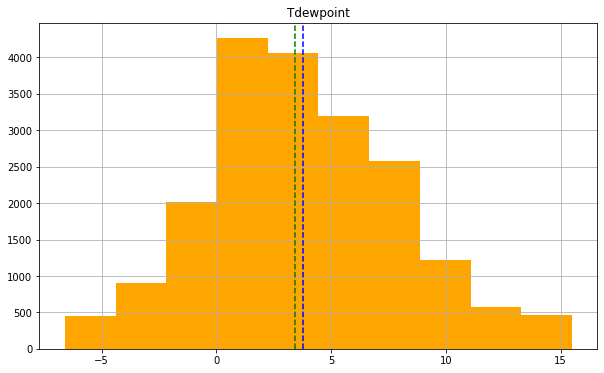

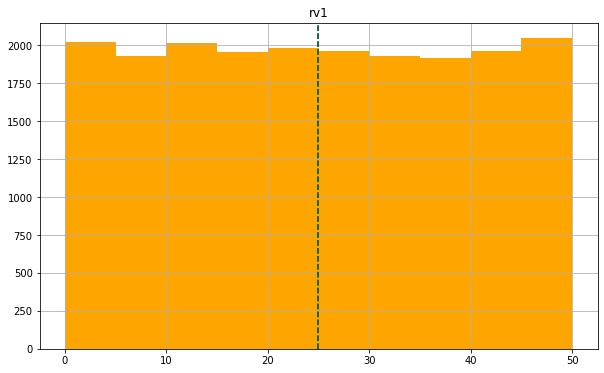

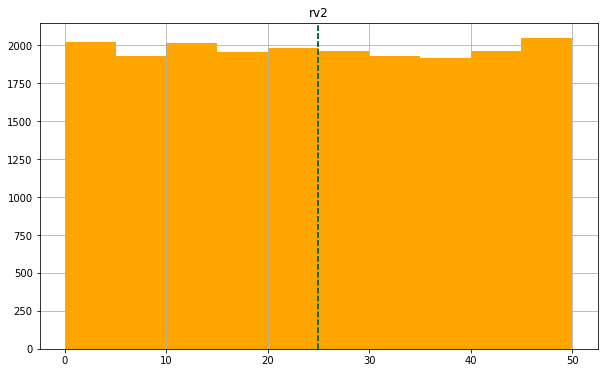

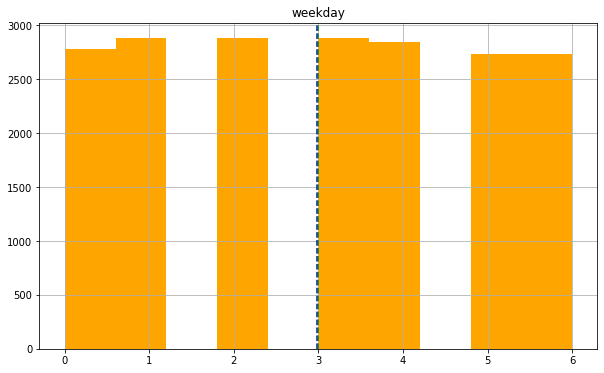

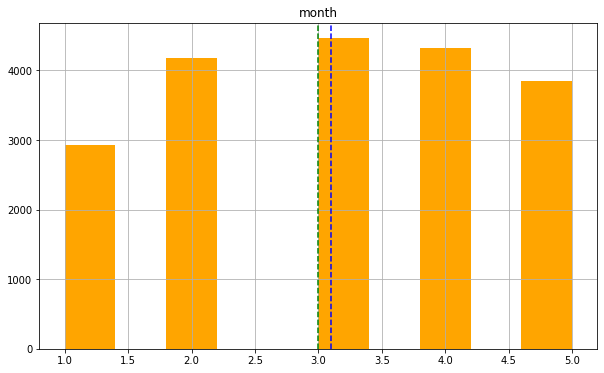

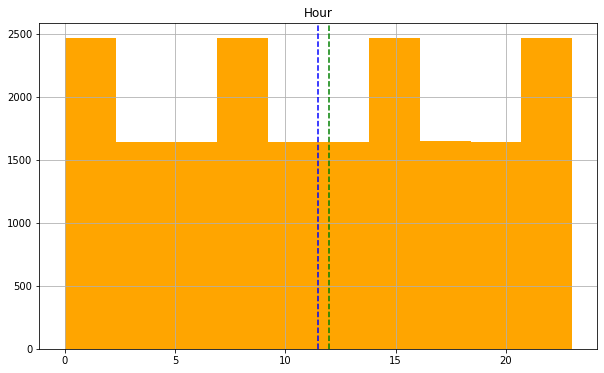

In [15]:
for col in df_energy:
  figure = plt.figure(figsize=(10,6))
  current_axis = figure.gca()
  feature=df_energy[col]
  feature.hist(ax=current_axis,color="orange")
  current_axis.axvline(feature.mean(),color="blue",linestyle="--")
  current_axis.axvline(feature.median(),color="green",linestyle="--")
  current_axis.set_title(col)
plt.show()


rh_out,rh_6,windspeed,visibility,rv1,rv2 has irragular shape

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

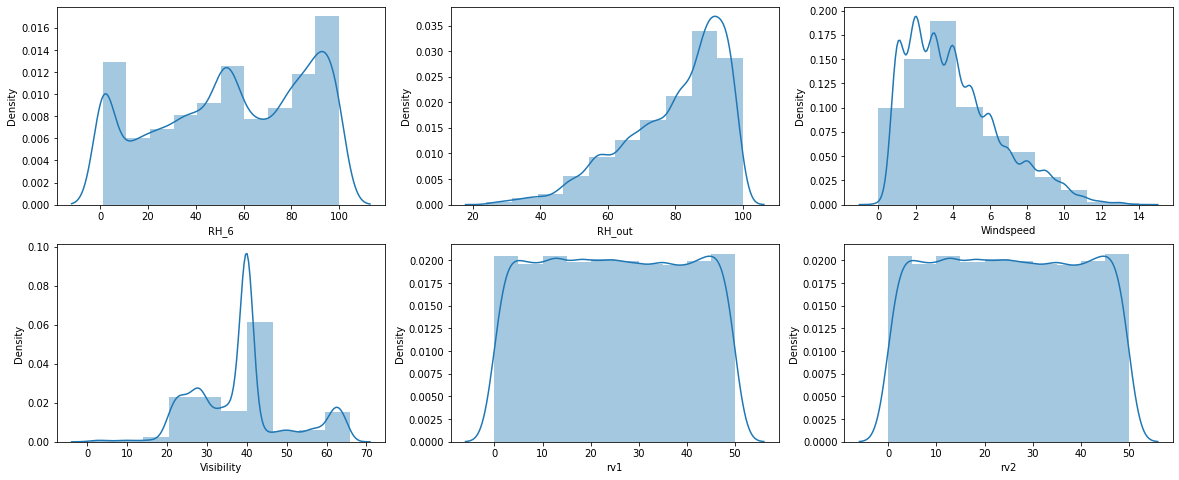

In [16]:
f,ax =plt.subplots(2,3,figsize=(20,8))
v1 = sns.distplot(df_energy["RH_6"],bins=10,ax=ax[0][0])
v2 = sns.distplot(df_energy["RH_out"],bins=10,ax=ax[0][1])
v3 = sns.distplot(df_energy["Windspeed"],bins=10,ax=ax[0][2])
v4 = sns.distplot(df_energy["Visibility"],bins=10,ax=ax[1][0])
v5 = sns.distplot(df_energy["rv1"],bins=10,ax=ax[1][1])
v6 = sns.distplot(df_energy["rv2"],bins=10,ax=ax[1][2])

In [18]:
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month,Hour
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0,1,17
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0,1,17
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0,1,17
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0,1,17
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0,1,17


In [19]:
df_energy.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month,Hour
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,4,5,17
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,4,5,17
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,4,5,17
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,4,5,17
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851,4,5,18


Text(0, 0.5, 'Date')

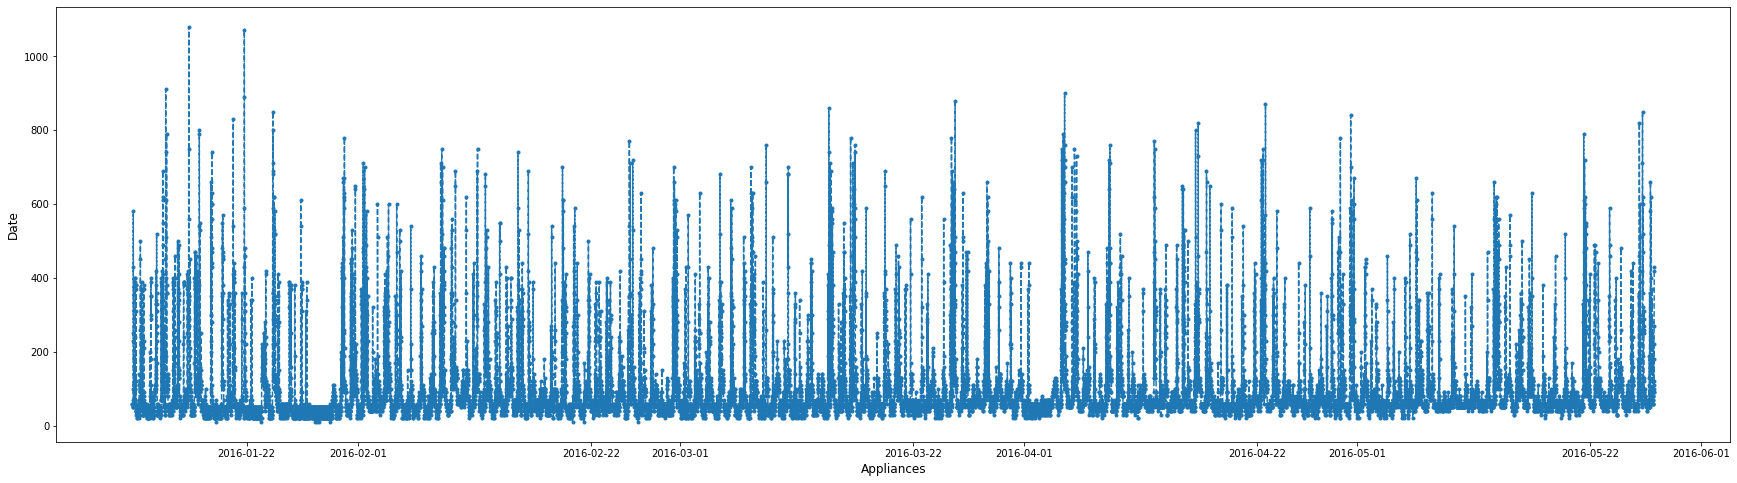

In [20]:
fig,ax=plt.subplots(figsize=(30,8))
ax.plot(df_energy["date"],df_energy["Appliances"],marker=".",linestyle="--")
plt.xlabel("Appliances",size=12)
plt.ylabel("Date",size=12)


In [21]:
print("Percentage of appliances consumption less than 200 wh")
print("Appliances",(df_energy["Appliances"][df_energy["Appliances"]<=200].count())/len(df_energy["Appliances"])*100)

Percentage of appliances consumption less than 200 wh
Appliances 90.29136052698252


Text(0, 0.5, 'Appliances')

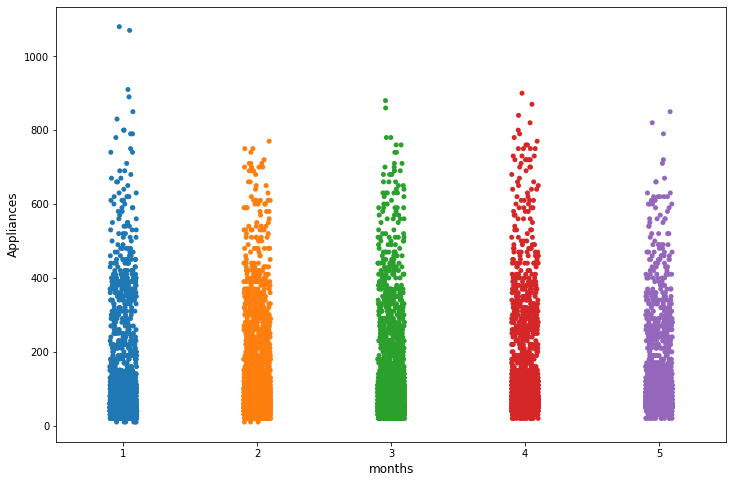

In [22]:
plt.figure(figsize=(12,8))
sns.stripplot(x="month",y="Appliances",data=df_energy)
plt.xlabel("months",size=12)
plt.ylabel("Appliances",size=12)

Text(0, 0.5, 'Appliances')

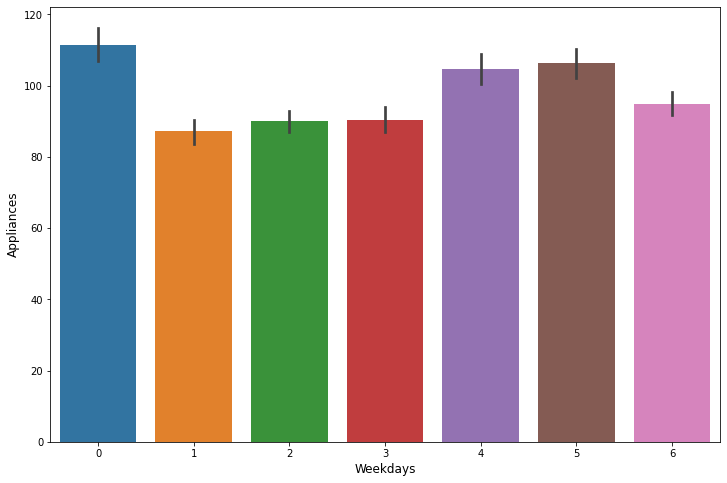

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x="weekday",y="Appliances",data=df_energy)
plt.xlabel("Weekdays",size=12)
plt.ylabel("Appliances",size=12)

Text(0, 0.5, 'Hour')

<Figure size 864x576 with 0 Axes>

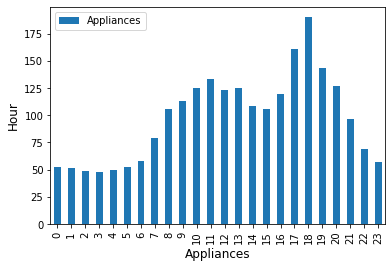

In [24]:
plt.figure(figsize=(12,8))
df_energy.groupby("Hour").agg({"Appliances":"mean"}).plot.bar()
plt.xlabel("Appliances",size=12)
plt.ylabel("Hour",size=12)

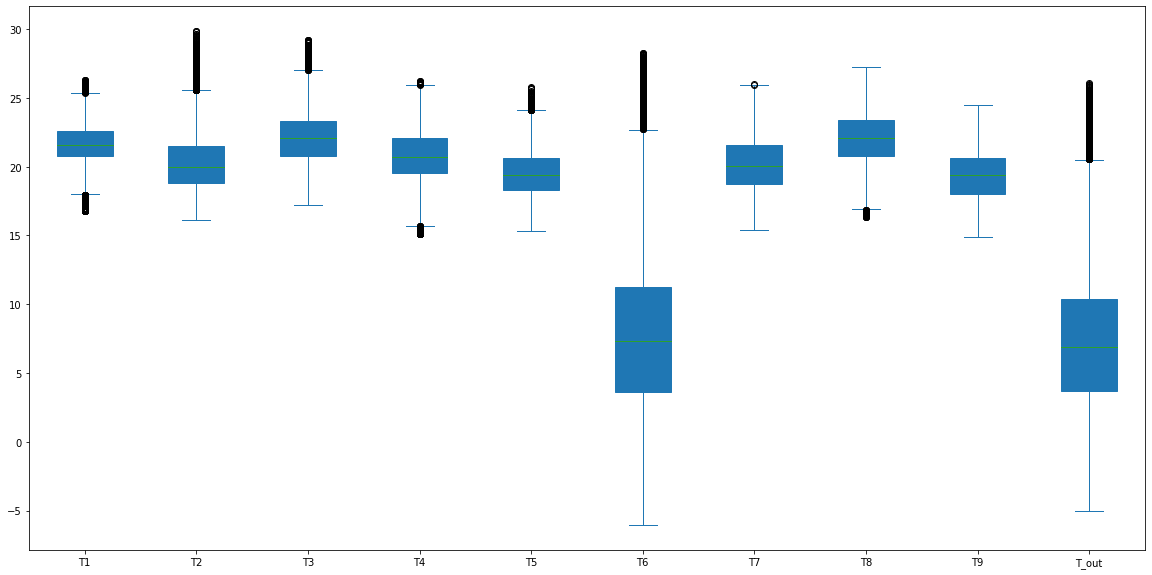

In [25]:
df1=pd.DataFrame(data=df_energy,columns=["T1","T2","T3","T4","T5","T6","T7","T8","T9","T_out"])
df1.plot(kind="box",patch_artist=True,figsize=(20,10))

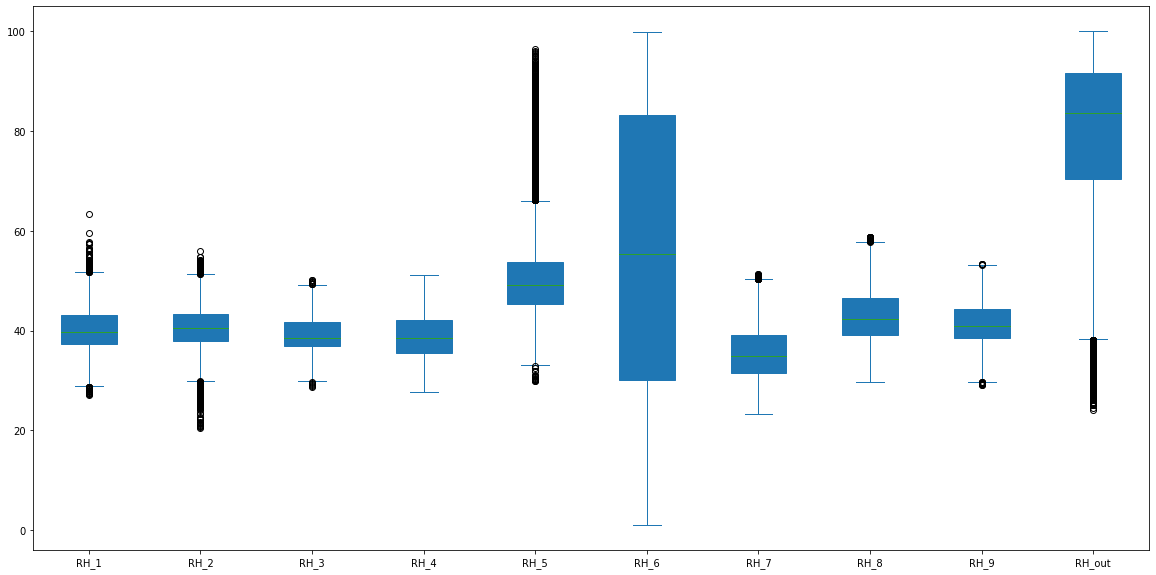

In [26]:
df2=pd.DataFrame(data=df_energy,columns=["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","RH_out"])
df2.plot(kind="box",patch_artist=True,figsize=(20,10))

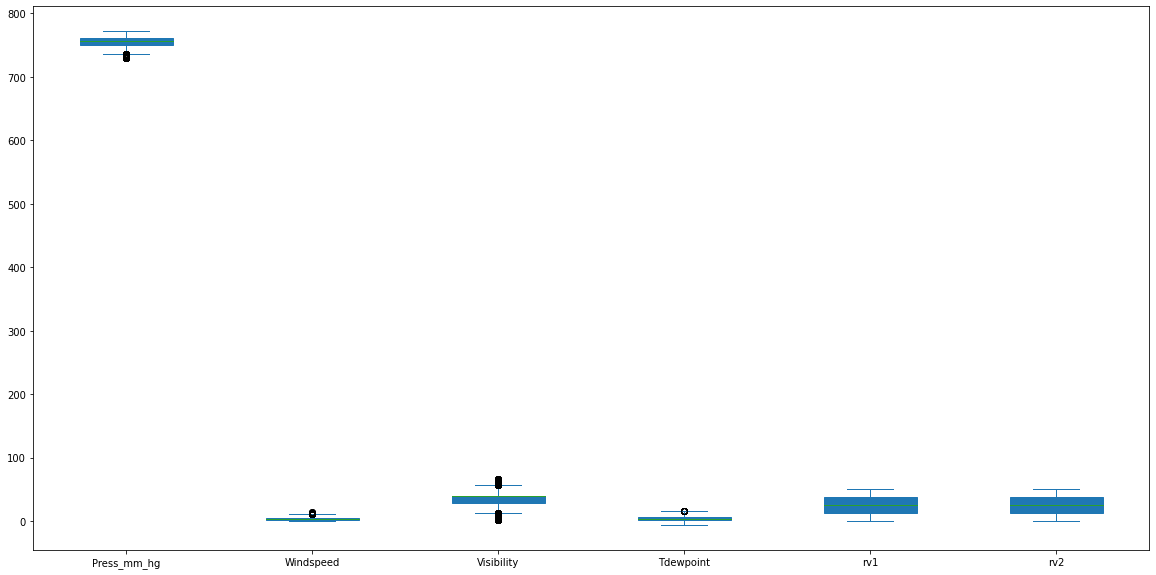

In [27]:
df3=pd.DataFrame(data=df_energy,columns=["Press_mm_hg","Windspeed","Visibility","Tdewpoint","rv1","rv2"])
df3.plot(kind="box",patch_artist=True,figsize=(20,10))

In [28]:
df_energy["lights"].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

In [29]:
df_energy.drop(["lights","date"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

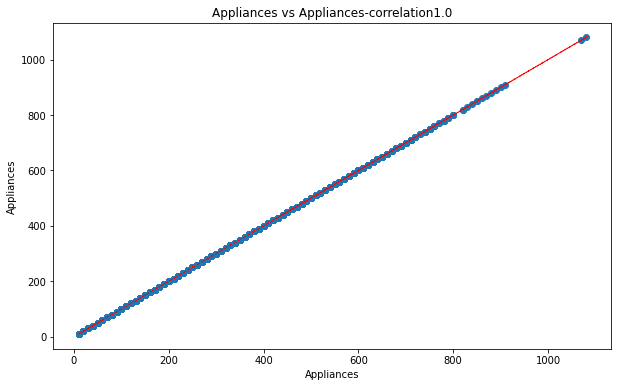

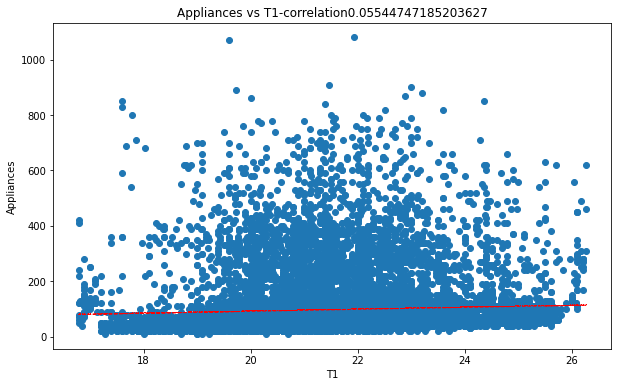

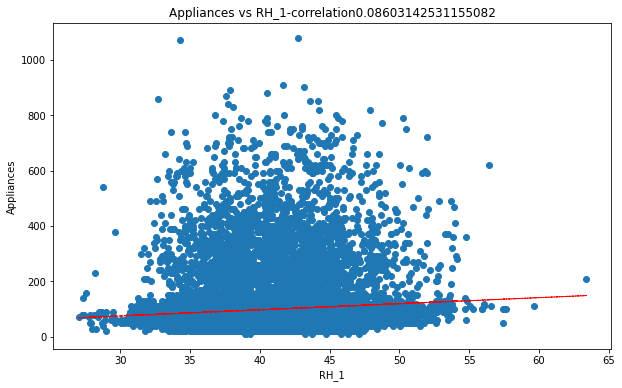

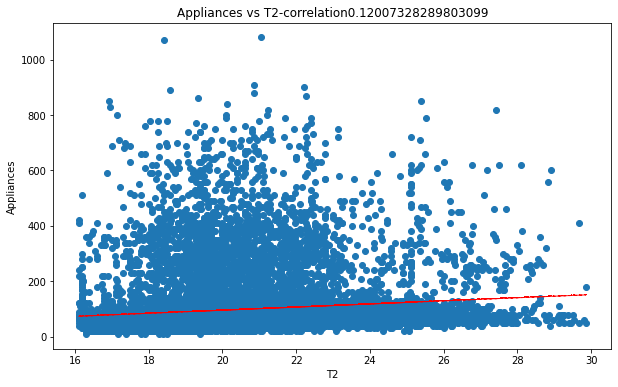

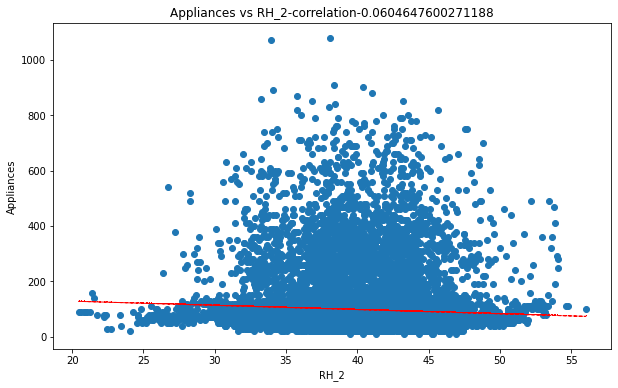

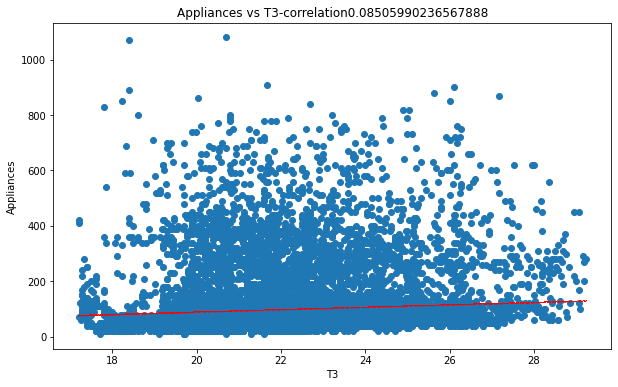

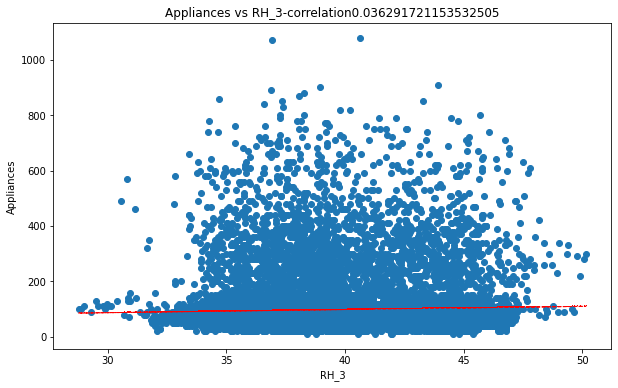

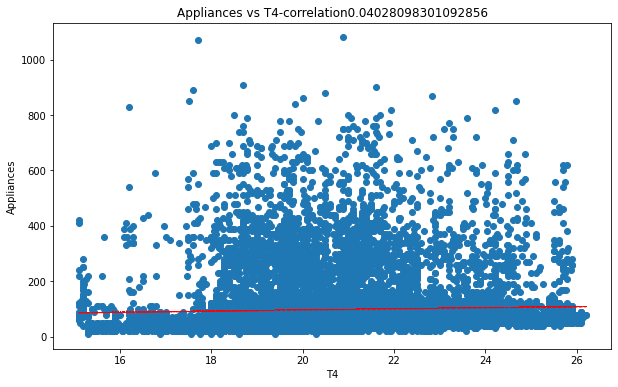

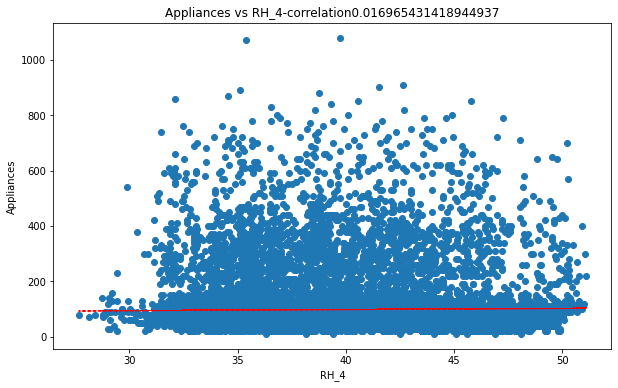

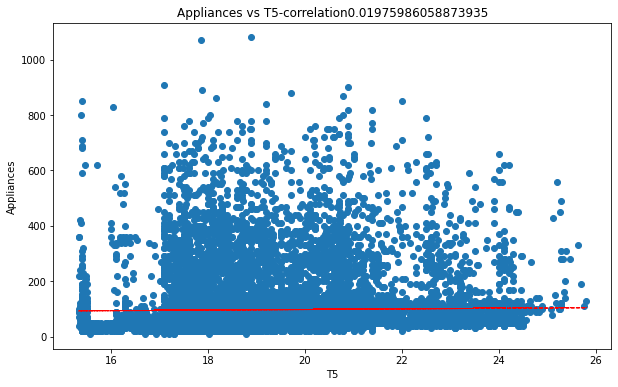

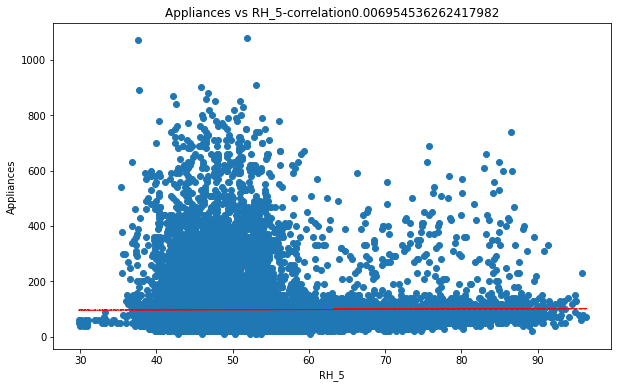

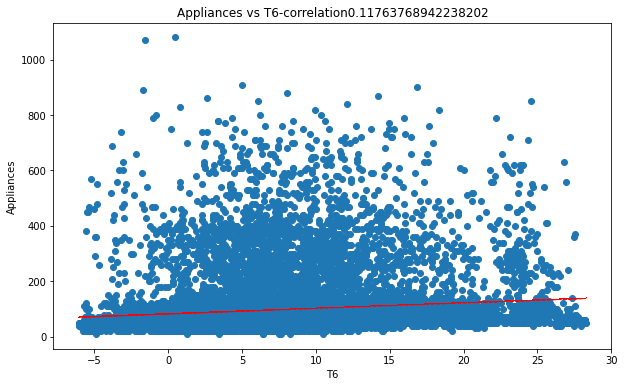

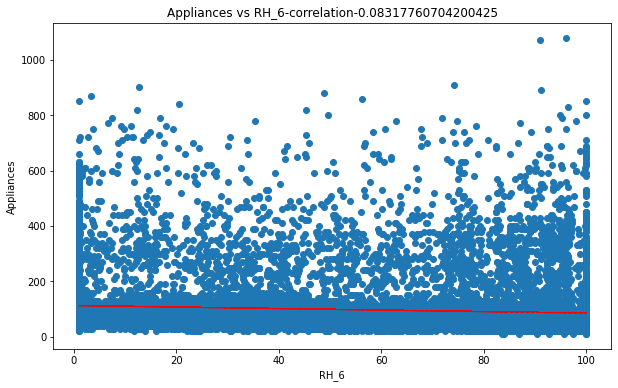

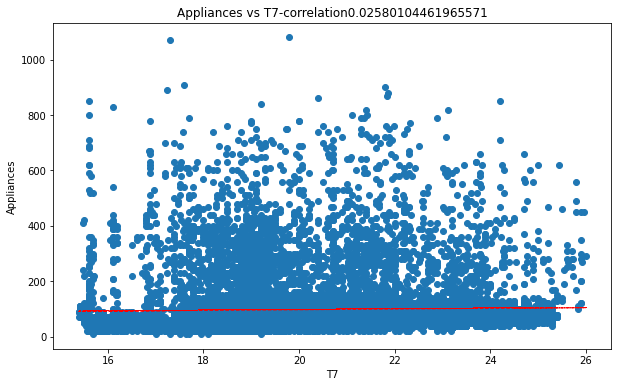

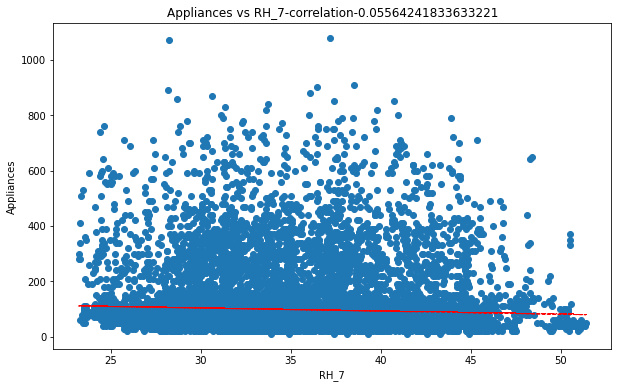

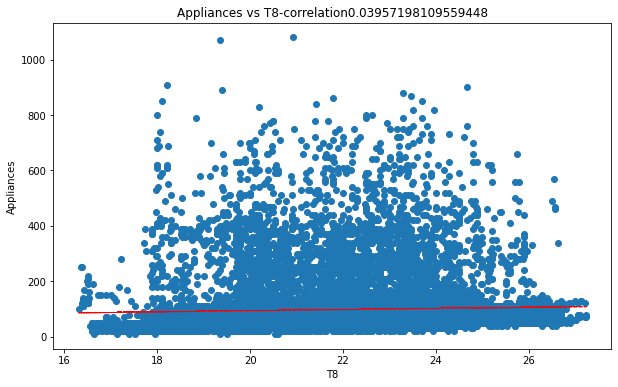

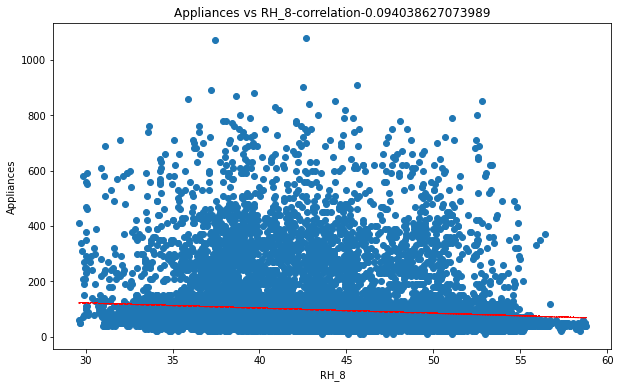

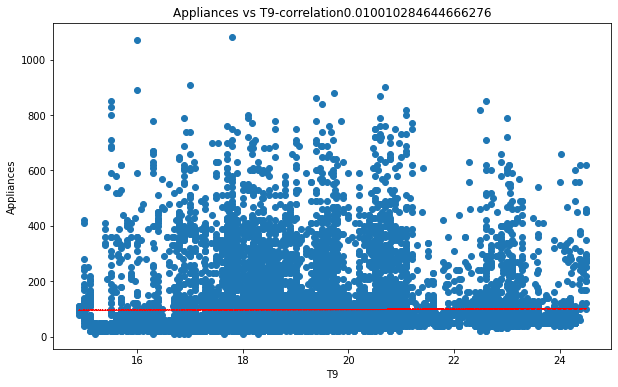

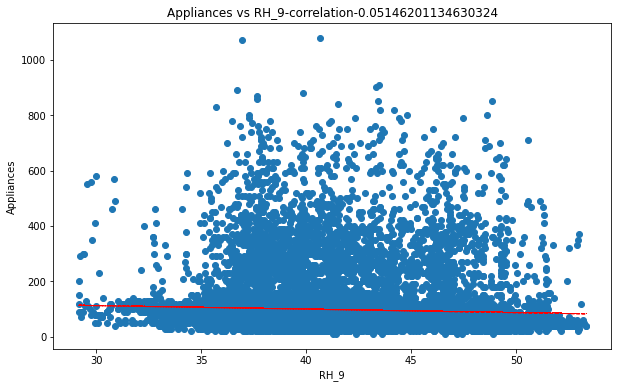

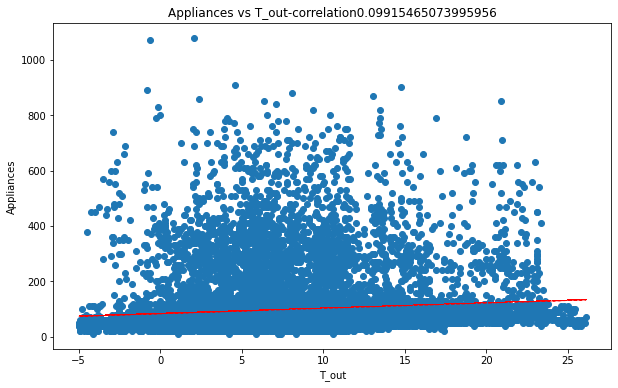

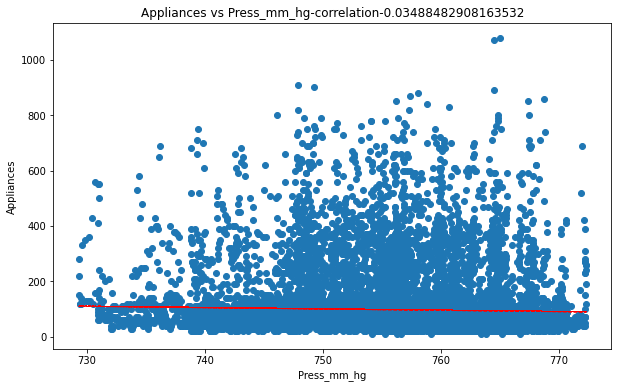

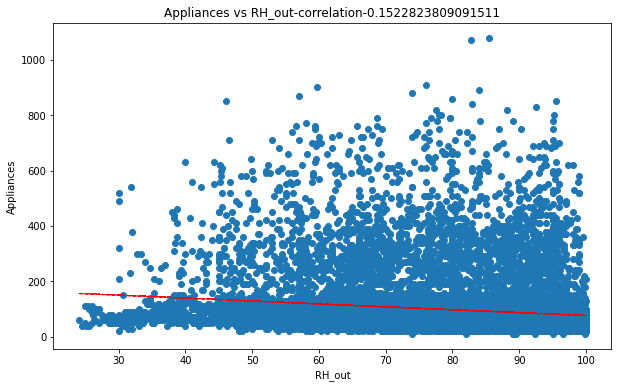

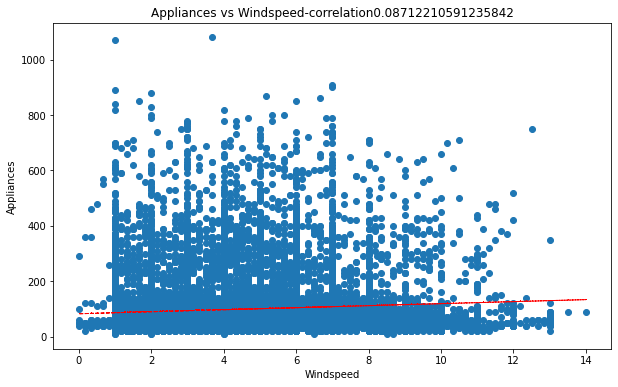

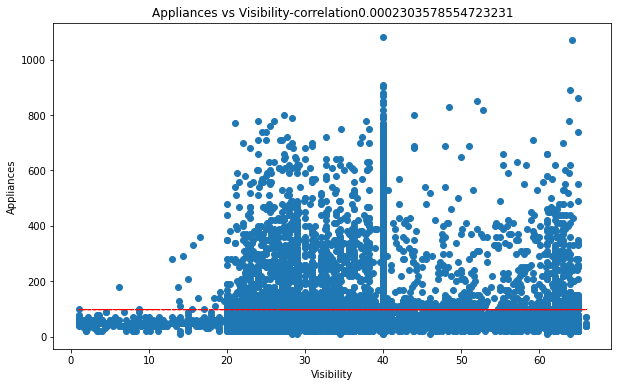

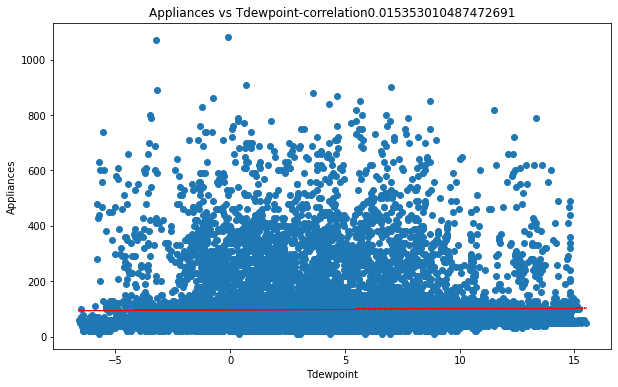

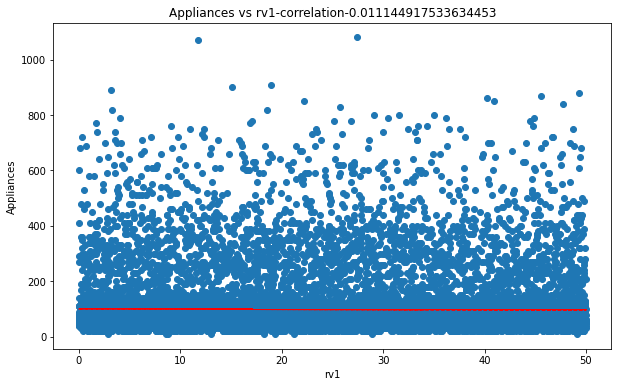

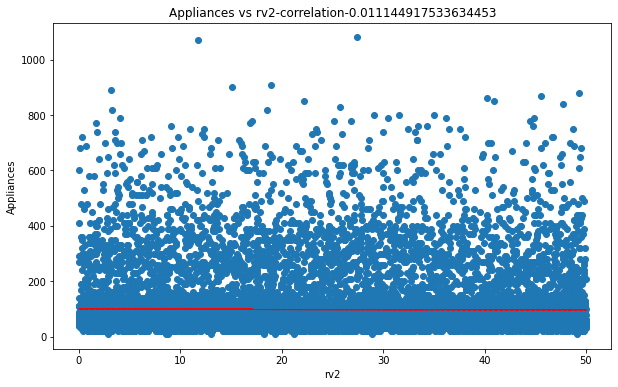

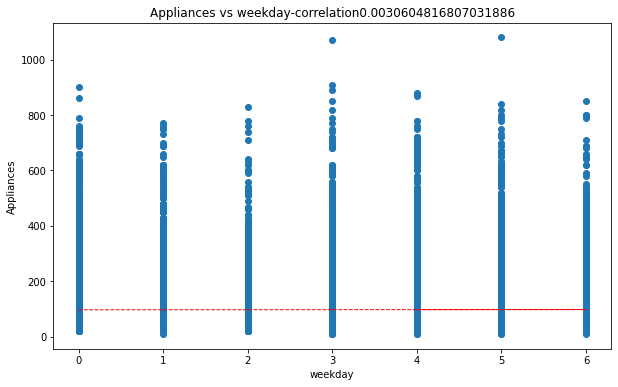

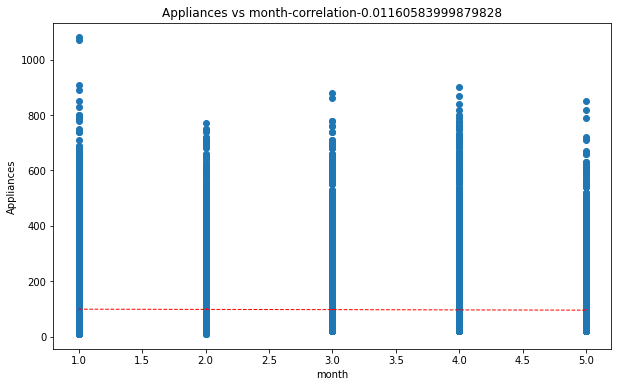

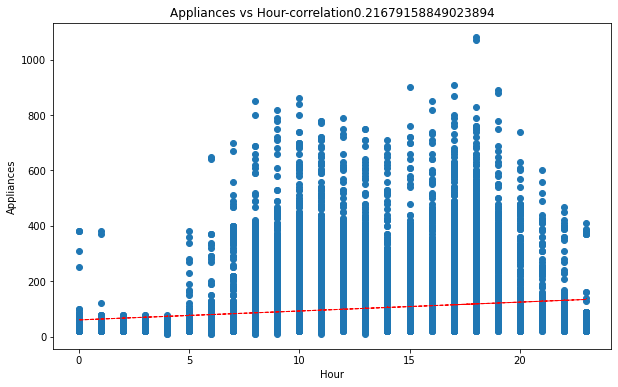

In [30]:
for col in df_energy:
  figure = plt.figure(figsize=(10,6))
  current_axis = figure.gca()
  feature=df_energy[col]
  label=df_energy["Appliances"]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel("Appliances")
  current_axis.set_title("Appliances vs" + " "+col+"-correlation"+str(correlation))
  z=np.polyfit(df_energy[col],df_energy["Appliances"],1)
  y=np.poly1d(z)(df_energy[col])
  plt.plot(df_energy[col],y,"r--,",lw=1)
plt.show()

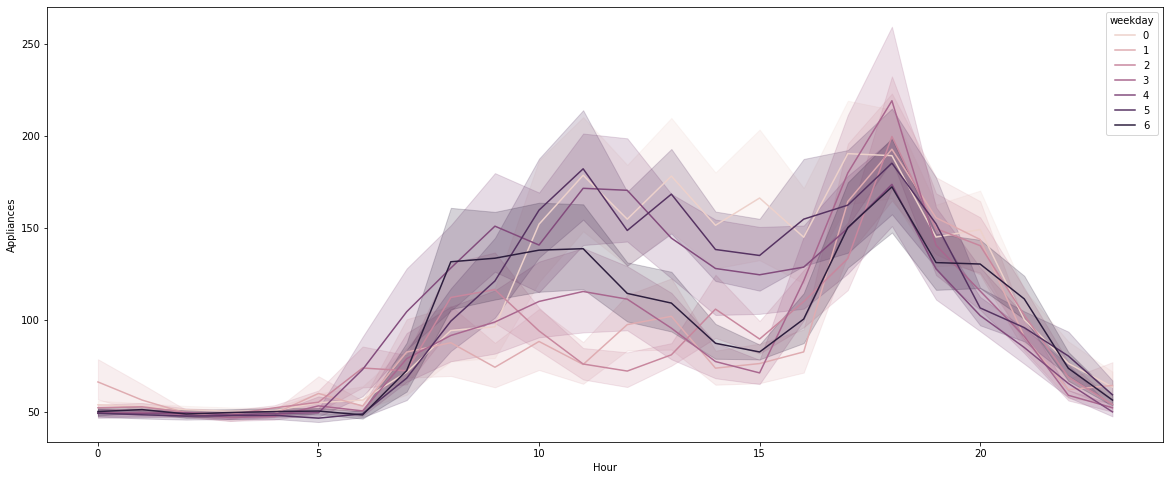

In [31]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Hour",y="Appliances",hue="weekday",data=df_energy)

Most values is '0' in lights column so drop this column

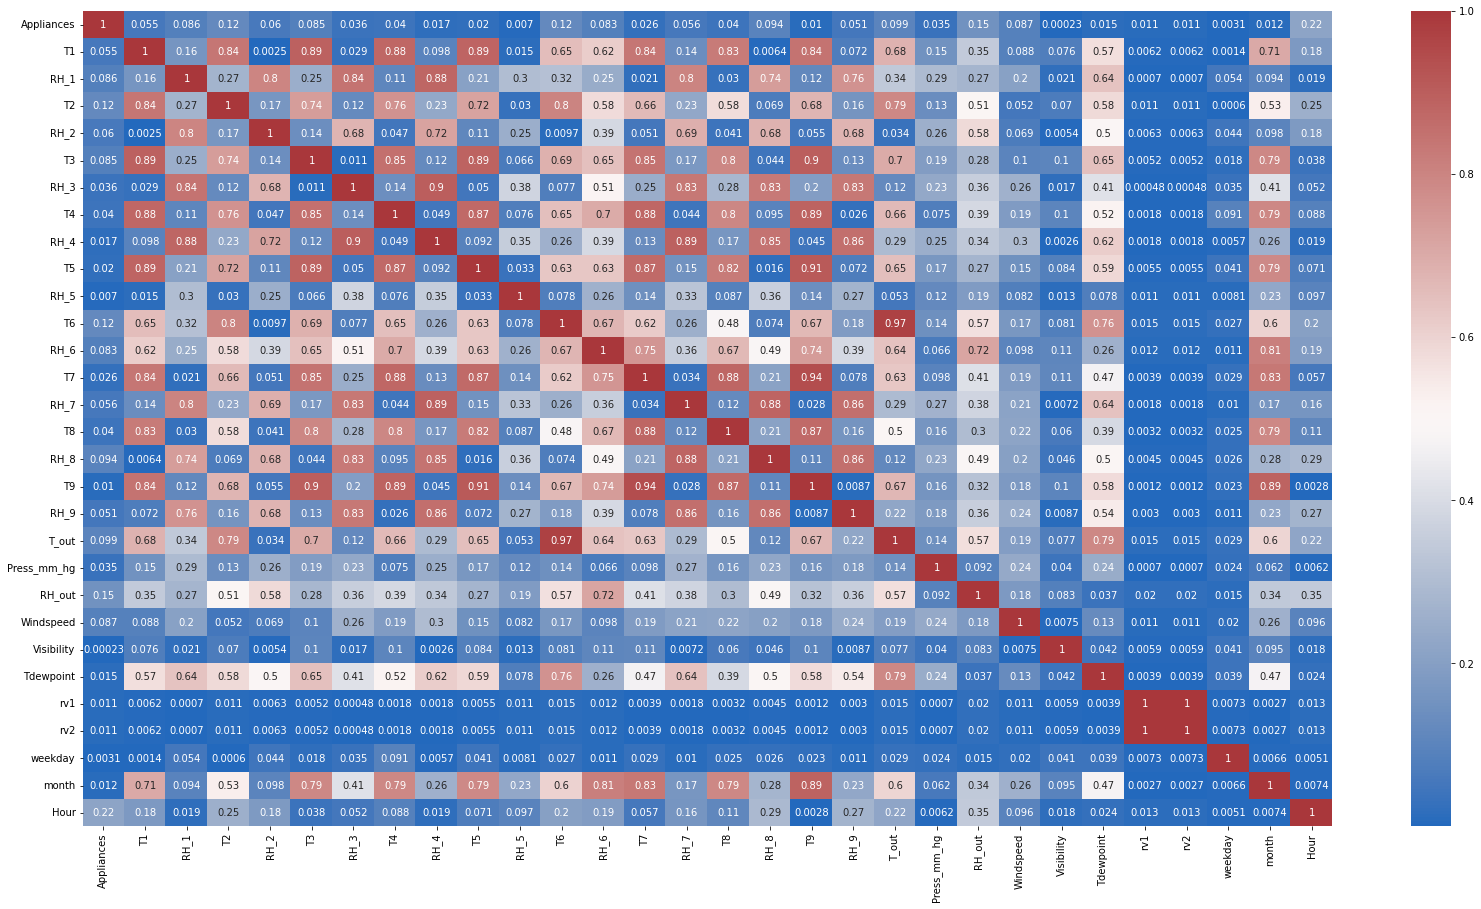

In [32]:
plt.figure(figsize=(28,15))
correlation=df_energy.corr()
sns.heatmap(abs(correlation),annot=True,cmap="vlag")

T9- HIGHLY CORRELATED TO T3,T5,T7,T9,T_OUT SO T9 AND T6 CAN BE REMOVE BECAUSE THAT INFORMATION CAN GIVEN BY OTHER FIELDS.

RV1,RV2,WEEKDAYS AND VISIBILITY COLUMN CAN BE REMOVED

Dependent variable does not has significant correlation with independent features

In [33]:
correlation

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month,Hour
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,0.003060,-0.011606,0.216792
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.001381,0.706305,0.178858
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,-0.053782,-0.094048,0.018594
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.000602,0.533479,0.254784
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.044249,-0.097914,-0.183322
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,-0.017514,0.790365,0.037624
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.035182,-0.414359,-0.052392
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,-0.091006,0.789168,0.088407
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.005749,-0.258167,-0.019068
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490,-0.040827,0.785865,0.071340


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
calc_vif(df_energy[[i for i in df_energy.columns if i !="Appliances"]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,T1,3696.343325
1,RH_1,1671.623725
2,T2,2492.593061
3,RH_2,2166.128604
4,T3,1266.628250
5,RH_3,1594.711214
6,T4,973.109107
7,RH_4,1419.199833
8,T5,1199.624872
9,RH_5,45.913242


In [36]:
calc_vif(df_energy[[i for i in df_energy.columns if i not in ["Appliances","rv1","rv2","weekday","visibility","T6","T9","month"]]])

,variables,VIF
0,T1,3235.991057
1,RH_1,1665.699925
2,T2,2114.847274
3,RH_2,2043.756640
4,T3,1169.397420
5,RH_3,1524.804107
6,T4,907.843713
7,RH_4,1376.971825
8,T5,1034.315257
9,RH_5,45.251062


In [37]:
df_energy.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'weekday', 'month', 'Hour'],
      dtype='object')

In [38]:
abs(correlation).Appliances

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2           0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6           0.083178
T7             0.025801
RH_7           0.055642
T8             0.039572
RH_8           0.094039
T9             0.010010
RH_9           0.051462
T_out          0.099155
Press_mm_hg    0.034885
RH_out         0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1            0.011145
rv2            0.011145
weekday        0.003060
month          0.011606
Hour           0.216792
Name: Appliances, dtype: float64

In [39]:
x=df_energy[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4','T5' ,'RH_4', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out','Windspeed', 'Tdewpoint']]

In [40]:
y=df_energy[["Appliances"]]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(15788, 21)
(3947, 21)


In [42]:
x_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_4', 'RH_5',
       'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Tdewpoint'],
      dtype='object')

In [43]:
x_test.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_4', 'RH_5',
       'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Tdewpoint'],
      dtype='object')

In [44]:
# scaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [45]:
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [46]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [47]:
lreg.score(x_train,y_train)

0.13595084946131297

In [48]:
lreg.coef_

array([[ 0.02307539,  0.64406123, -0.38347205, -0.62427638,  0.46127672,
         0.18126345, -0.02256749, -0.11182703,  0.09921293,  0.03332949,
         0.07399903, -0.17031371, -0.02241883,  0.14932202, -0.34949098,
        -0.08616427, -0.12711427,  0.02517457, -0.09681061,  0.04930456,
         0.14892482]])

In [49]:
lreg.intercept_

array([3.20351195e-15])

In [50]:
y_pred_test=lreg.predict(x_test)
y_pred_train=lreg.predict(x_train)

In [51]:
y_pred_test

array([[ 1.06831424],
       [ 0.03559808],
       [ 0.30999935],
       ...,
       [-0.10407314],
       [ 0.2122527 ],
       [ 0.30821356]])

In [52]:
y_test

array([[ 1.89984097],
       [-0.46613728],
       [ 1.60409369],
       ...,
       [-0.46613728],
       [ 1.9984234 ],
       [-0.26897242]])

In [53]:
y_pred_train

array([[-0.03411826],
       [-0.41907701],
       [-0.65712747],
       ...,
       [-0.29520009],
       [ 0.1750672 ],
       [-0.05312665]])

for test data

In [54]:
from sklearn.metrics import mean_squared_error,r2_score

MSE=mean_squared_error(y_test,y_pred_test)
print("MSE : ",MSE)

RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)

r2=r2_score(y_test,y_pred_test)
print("r2 score : ",r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_test)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

MSE :  0.9684658611224742
RMSE :  0.9841066309717023
r2 score :  0.12525403731862272
Adjusted R2 :  0.1259241863080982


for train data


In [55]:
MSE=mean_squared_error(y_train,y_pred_train)
print("MSE : ",MSE)

RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)

r2=r2_score(y_train,y_pred_train)
print("r2 score : ",r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train,y_pred_train)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

MSE :  0.864049150538687
RMSE :  0.9295424414940326
r2 score :  0.13595084946131297
Adjusted R2 :  0.13667822980237987


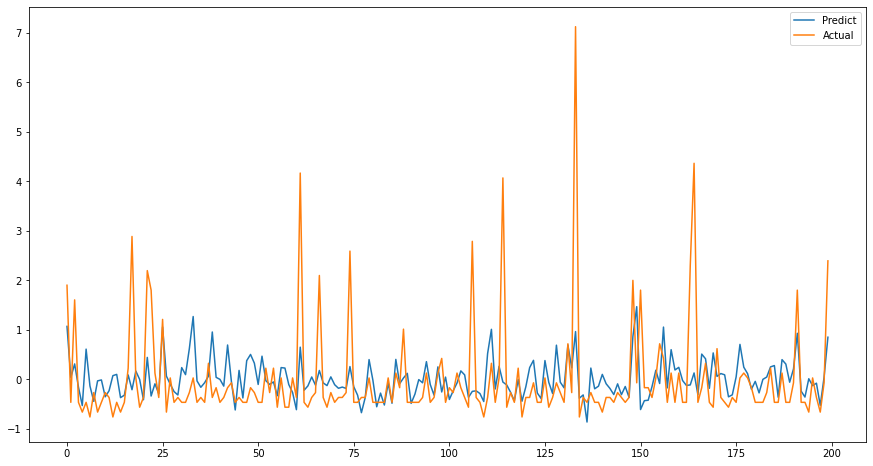

In [56]:
plt.figure(figsize=(15,8))
plt.plot((y_pred_test[:200]))
plt.plot((np.array(y_test[:200])))
plt.legend(["Predict","Actual"])
plt.show()

## lasso

In [57]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001,max_iter=4000)
lasso.fit(x_train,y_train)


Lasso(alpha=0.0001, max_iter=4000)

In [58]:
lasso.score(x_train,y_train)

0.13594135779611738

In [59]:
lasso.coef_

array([ 0.01994786,  0.64104267, -0.37697875, -0.61735096,  0.45979288,
        0.18040338, -0.02253689, -0.1123578 ,  0.09771788,  0.03336027,
        0.07203057, -0.16994257, -0.02217087,  0.14894264, -0.34913449,
       -0.08610659, -0.09972948,  0.02515277, -0.07960886,  0.05005094,
        0.12454762])

In [60]:
lasso.intercept_

array([3.2014094e-15])

In [61]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={"alpha":[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.439e+03, tolerance: 1.263e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.462e+03, tolerance: 1.261e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [62]:
print("Best fit alpha value is :",lasso_regressor.best_params_)
print("\nusing",lasso_regressor.best_params_,"the negative mean squred error is : ",lasso_regressor.best_score_)

Best fit alpha value is : {'alpha': 0.0001}

using {'alpha': 0.0001} the negative mean squred error is :  -0.8672875045673244


In [63]:
y_pred_lasso_test=lasso_regressor.predict(x_test)
y_pred_lasso_train=lasso_regressor.predict(x_train)

In [64]:
y_pred_lasso_test

array([ 1.06862413,  0.03311933,  0.30927482, ..., -0.10208065,
        0.20917184,  0.30621537])

In [65]:
y_pred_lasso_train

array([-0.03585005, -0.41469613, -0.65493439, ..., -0.29731239,
        0.17371513, -0.05388923])

Test data

In [66]:
MSE=mean_squared_error(y_test,y_pred_lasso_test)
print("MSE : ",MSE)

RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)

r2=r2_score(y_test,y_pred_lasso_test)
print("r2 score : ",r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso_test)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))



MSE :  0.9683731332554063
RMSE :  0.9840595171306491
r2 score :  0.1253377917704851
Adjusted R2 :  0.1260083888729514


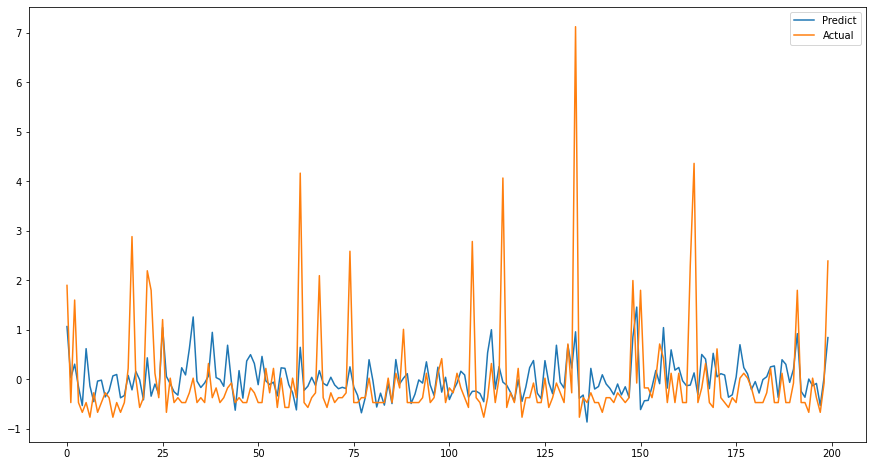

In [67]:
plt.figure(figsize=(15,8))
plt.plot((y_pred_lasso_test[:200]))
plt.plot((np.array(y_test[:200])))
plt.legend(["Predict","Actual"])
plt.show()

train data

In [68]:
MSE=mean_squared_error(y_train,y_pred_lasso_train)
print("MSE : ",MSE)

RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)

r2=r2_score(y_train,y_pred_lasso_train)
print("r2 score : ",r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train,y_pred_lasso_train)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

MSE :  0.8640586422038826
RMSE :  0.9295475470377417
r2 score :  0.13594135779611738
Adjusted R2 :  0.1366686873537526


## Ridge

In [69]:
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={"alpha":[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [70]:
print("Best fit alpha value in ridge is :",ridge_regressor.best_params_)
print("\nusing",ridge_regressor.best_params_,"the negative mean squred error is : ",ridge_regressor.best_score_)

Best fit alpha value in ridge is : {'alpha': 10}

using {'alpha': 10} the negative mean squred error is :  -0.8672629485545708


In [71]:
y_pred_ridge_test=ridge_regressor.predict(x_test)
y_pred_ridge_train=ridge_regressor.predict(x_train)

In [72]:
y_pred_ridge_test

array([[ 1.06423738],
       [ 0.03226149],
       [ 0.31434412],
       ...,
       [-0.10450811],
       [ 0.20707598],
       [ 0.30914021]])

In [73]:
y_pred_ridge_train

array([[-0.03494061],
       [-0.41558169],
       [-0.65601461],
       ...,
       [-0.29465545],
       [ 0.17489807],
       [-0.0495295 ]])

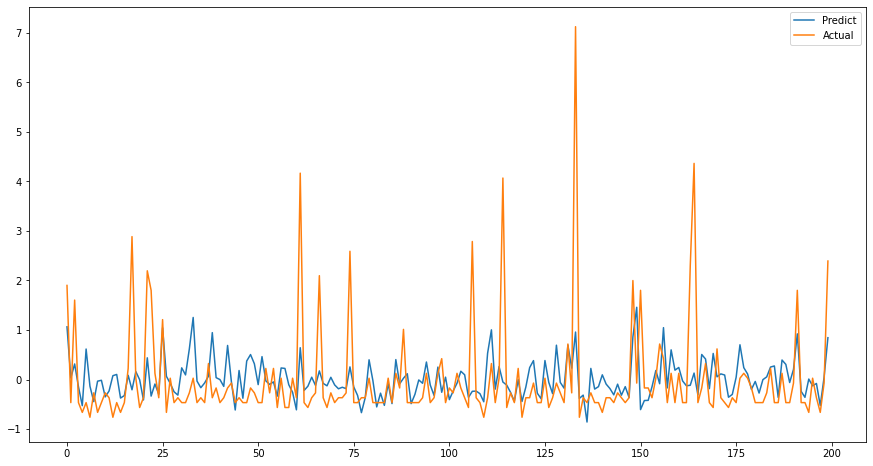

In [74]:
plt.figure(figsize=(15,8))
plt.plot((y_pred_ridge_test[:200]))
plt.plot((np.array(y_test[:200])))
plt.legend(["Predict","Actual"])
plt.show()

test data

In [75]:
MSE=mean_squared_error(y_test,y_pred_ridge_test)
print("MSE : ",MSE)

RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)

r2=r2_score(y_test,y_pred_ridge_test)
print("r2 score : ",r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_ridge_test)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

MSE :  0.968441484839452
RMSE :  0.984094245913191
r2 score :  0.1252760546720626
Adjusted R2 :  0.12594632146139084


train data

In [76]:
MSE=mean_squared_error(y_train,y_pred_ridge_train)
print("MSE : ",MSE)

RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)

r2=r2_score(y_train,y_pred_ridge_train)
print("r2 score : ",r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train,y_pred_ridge_train)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

MSE :  0.8640709650181148
RMSE :  0.9295541754078214
r2 score :  0.13592903498188524
Adjusted R2 :  0.1366562986085399


fitting model

In [77]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [78]:
model=[
    ["Lasso : ",Lasso()],
    ["Ridge : ",Ridge()],
    ["ElasticNet : ",ElasticNet()],
    ["Randomforest : ",RandomForestRegressor()],
    ["Gradientboosting : ",GradientBoostingRegressor()],
    ["Xgboost : ",XGBRegressor()],
    ["svm : ",SVR()],
    ["Kneighboursregressor : ",neighbors.KNeighborsRegressor()],
]

In [79]:
model_list=[]
for name,fit_model in model:
  fit_model_list={}
  fit_model.random_state=100
  fit_model_list["Name"]=name
  fit_model.fit(x_train,y_train)
  fit_model_list["Train_r2_score"]=r2_score(y_train,fit_model.predict(x_train))
  fit_model_list["Test_r2_score"]=r2_score(y_test,fit_model.predict(x_test))
  fit_model_list["Train_MSE_score"]=mean_squared_error(y_train,fit_model.predict(x_train))
  fit_model_list["Test_MSE_score"]=mean_squared_error(y_test,fit_model.predict(x_test))
  fit_model_list["Train_RMSE_score"]=np.sqrt(mean_squared_error(y_train,fit_model.predict(x_train)))
  fit_model_list["Test_RMSE_score"]=np.sqrt(mean_squared_error(y_test,fit_model.predict(x_test)))
  model_list.append(fit_model_list)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[05:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
model_list

[{'Name': 'Lasso : ',
  'Test_MSE_score': 1.1075498656916107,
  'Test_RMSE_score': 1.0524019506308466,
  'Test_r2_score': -0.00037059887598722696,
  'Train_MSE_score': 1.0,
  'Train_RMSE_score': 1.0,
  'Train_r2_score': 0.0},
 {'Name': 'Ridge : ',
  'Test_MSE_score': 0.9684608282971952,
  'Test_RMSE_score': 0.9841040739155565,
  'Test_r2_score': 0.12525858310982763,
  'Train_MSE_score': 0.8640493887661296,
  'Train_RMSE_score': 0.9295425696363397,
  'Train_r2_score': 0.13595061123387042},
 {'Name': 'ElasticNet : ',
  'Test_MSE_score': 1.1075498656916107,
  'Test_RMSE_score': 1.0524019506308466,
  'Test_r2_score': -0.00037059887598722696,
  'Train_MSE_score': 1.0,
  'Train_RMSE_score': 1.0,
  'Train_r2_score': 0.0},
 {'Name': 'Randomforest : ',
  'Test_MSE_score': 0.5024295562475328,
  'Test_RMSE_score': 0.7088226550044325,
  'Test_r2_score': 0.5461913078175655,
  'Train_MSE_score': 0.05946751771063171,
  'Train_RMSE_score': 0.2438596270616186,
  'Train_r2_score': 0.9405324822893683},
 

In [81]:
dataframe=pd.DataFrame(model_list)

In [128]:
model_dataframe=dataframe.sort_values(by="Train_r2_score",ascending=False)

In [129]:
model_dataframe

,Name,Train_r2_score,Test_r2_score,Train_MSE_score,Test_MSE_score,Train_RMSE_score,Test_RMSE_score
3,Randomforest :,0.940532,0.546191,0.059468,0.502430,0.243860,0.708823
7,Kneighboursregressor :,0.696022,0.454429,0.303978,0.604023,0.551342,0.777189
4,Gradientboosting :,0.331111,0.230639,0.668889,0.851790,0.817856,0.922925
5,Xgboost :,0.326152,0.236348,0.673848,0.845470,0.820883,0.919494
6,svm :,0.242006,0.196566,0.757994,0.889514,0.870628,0.943141
1,Ridge :,0.135951,0.125259,0.864049,0.968461,0.929543,0.984104
0,Lasso :,0.000000,-0.000371,1.000000,1.107550,1.000000,1.052402
2,ElasticNet :,0.000000,-0.000371,1.000000,1.107550,1.000000,1.052402


Text(0.5, 1.0, 'R2 Score')

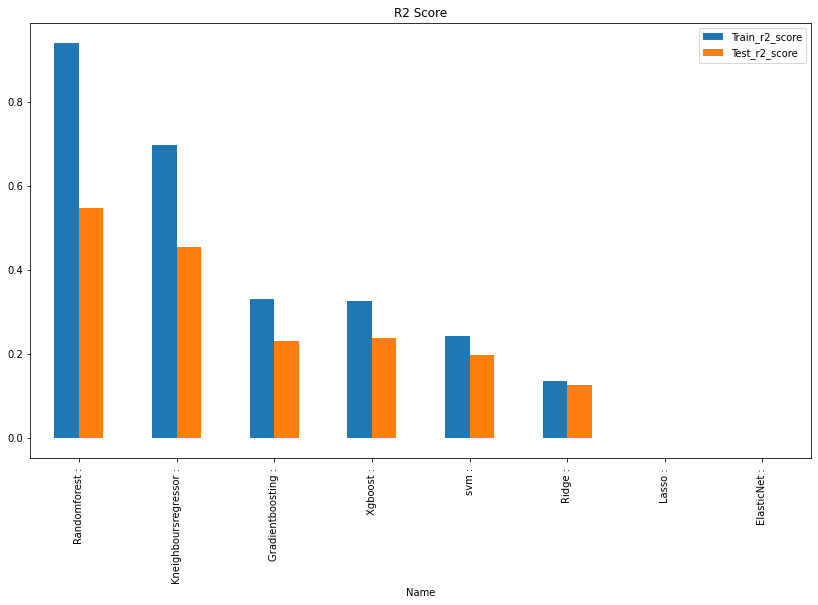

In [84]:

model_dataframe.plot(y=["Train_r2_score","Test_r2_score"],kind="bar",figsize=(14,8))
plt.title("R2 Score")

Hyper parameter tuning

In [85]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=40)
parameters=[{'n_estimators' :[50,70,100,150,200,130,260],
             'max_depth'  :[100,150,200,250],
             'max_features' :["sqrt", "log2", "auto"]
             }]
rf_grid_search=GridSearchCV(estimator=rf,param_grid=parameters,scoring="r2",n_jobs =-1,cv=5,verbose=2)
rf_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [100, 150, 200, 250],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [50, 70, 100, 150, 200, 130, 260]}],
             scoring='r2', verbose=2)

In [86]:
rf_grid_search.best_params_

{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 260}

In [91]:
rf_grid_search.best_estimator_

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=260,
                      random_state=40)

In [92]:
y_pred_train=rf_grid_search.best_estimator_.score(x_train,y_train)

In [94]:
y_pred_train

0.9456129780703171

In [93]:
y_pred_test=rf_grid_search.best_estimator_.score(x_test,y_test)

In [95]:
y_pred_test

0.5622271917467065

In [104]:
Mse_test=(mean_squared_error(y_test,rf_grid_search.best_estimator_.predict(x_test)))

In [105]:
Mse_test

0.48467559475374034

In [102]:
np.sqrt(mean_squared_error(y_test,rf_grid_search.best_estimator_.predict(x_test)))

0.6961864655060025

In [106]:
Mse_train=(mean_squared_error(y_train,rf_grid_search.best_estimator_.predict(x_train)))

In [107]:
Mse_train

0.05438702192968292

In [100]:
np.sqrt(mean_squared_error(y_train,rf_grid_search.best_estimator_.predict(x_train)))

0.2332102526255716

In [114]:
model_=[['Tuned Random Forest',0.94561,0.56222,0.054387,0.48467,0.23321,0.69618]]

In [120]:
Tunedrf=pd.DataFrame(model_,columns=["Name","Train_r2_score","Test_r2_score","Train_MSE_score","Test_MSE_score","Train_RMSE_score","Test_RMSE_score"])

In [121]:
Tunedrf

,Name,Train_r2_score,Test_r2_score,Train_MSE_score,Test_MSE_score,Train_RMSE_score,Test_RMSE_score
0,Tuned Random Forest,0.94561,0.56222,0.054387,0.48467,0.23321,0.69618


In [130]:
all_model = model_dataframe.append(Tunedrf).set_index("Name").sort_values(by="Train_r2_score",ascending=False)

In [131]:
all_model

,Train_r2_score,Test_r2_score,Train_MSE_score,Test_MSE_score,Train_RMSE_score,Test_RMSE_score
Name,,,,,,
Tuned Random Forest,0.945610,0.562220,0.054387,0.484670,0.233210,0.696180
Randomforest :,0.940532,0.546191,0.059468,0.502430,0.243860,0.708823
Kneighboursregressor :,0.696022,0.454429,0.303978,0.604023,0.551342,0.777189
Gradientboosting :,0.331111,0.230639,0.668889,0.851790,0.817856,0.922925
Xgboost :,0.326152,0.236348,0.673848,0.845470,0.820883,0.919494
svm :,0.242006,0.196566,0.757994,0.889514,0.870628,0.943141
Ridge :,0.135951,0.125259,0.864049,0.968461,0.929543,0.984104
Lasso :,0.000000,-0.000371,1.000000,1.107550,1.000000,1.052402
ElasticNet :,0.000000,-0.000371,1.000000,1.107550,1.000000,1.052402


Text(0.5, 1.0, 'R2 Score')

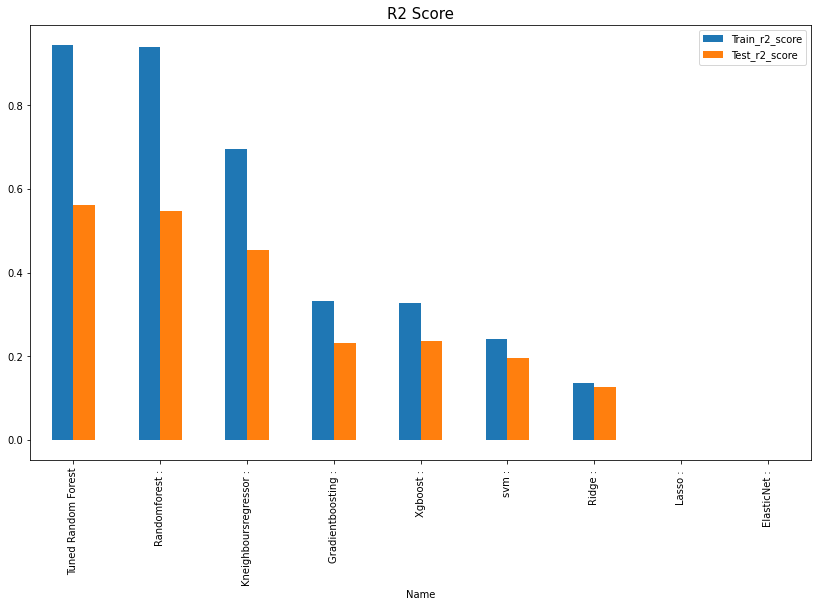

In [133]:
all_model.plot(y=["Train_r2_score","Test_r2_score"], kind="bar", figsize=(14,8))
plt.title("R2 Score",size=15)

## **Conclusion:-**

 

###*   The Dataset does not contains null values ,but there is very less correlation between features and target variables.
###*   Dropped some irrelevent features like rv1,rv2 which has infinite VIF. also removed features like visibility that has very less correlartion with target variable.
###*     By fitting all the model get best score in Random Forest regressor , after tuting the hyper parameter using GridsearchCV, GET Train r2 score 0.94 and test r2 score 0.5622 because of improper dataset and less correlation between feature and target variable.
###*   The performance is low due to like:- no proper pattern of data, less correlation , not enough relevent features.







